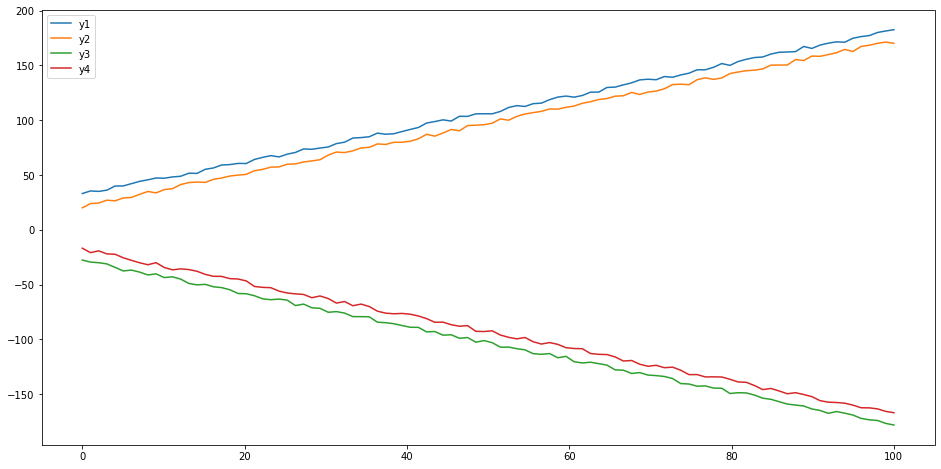

In [54]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
t = np.linspace(0,100,100)

c2 = 20
c4 = -20
c1 = c2 + 10 
c3 = c4 + -10
m1, m3 = 1.5, -1.5

y1 = m1 * t + c1 + np.random.uniform(0,4, (t.size,))
y2 = m1 * t + c2 + np.random.uniform(0,4, (t.size,))
y3 = m3 * t + c3 + np.random.uniform(0,4, (t.size,))
y4 = m3 * t + c4 + np.random.uniform(0,4, (t.size,))


plt.plot(t, y1, label="y1")
plt.plot(t, y2, label="y2")
plt.plot(t, y3, label="y3")
plt.plot(t, y4, label="y4")

plt.legend()

In [42]:
y1

array([20.1       , 21.76666667, 23.43333333, 25.1       , 26.76666667,
       28.43333333, 30.1       , 31.76666667, 33.43333333, 35.1       ])

In [73]:
# dataset
series = {}
series['s1'] = y1
series['s2'] = y2
series['s3'] = y3
series['s4'] = y4

def hpr(s):
    """Holding peroid return."""
    return (s[-1] - s[0]) / s
returns = hpr(y1), hpr(y2), hpr(y3), hpr(y4)
# returns

In [74]:
def daily_return(s):
    return np.log(s[1:] / np.roll(s, 1)[1:])
y1_ret = daily_return(y1)
y2_ret = daily_return(y2)
y3_ret = daily_return(y3)
y4_ret = daily_return(y4)


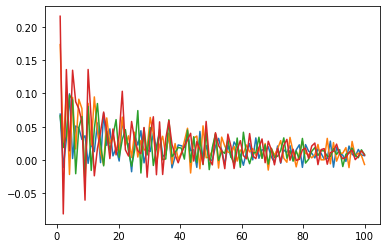

In [98]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, fcluster
from fastcluster import linkage
from itertools import combinations
from scipy.spatial.distance import  euclidean, correlation, cosine, euclidean, cityblock
from fastdtw import fastdtw

plt.plot(t[1:], y1_ret)
plt.plot(t[1:], y2_ret)
plt.plot(t[1:], y3_ret)
plt.plot(t[1:], y4_ret)

In [86]:
labels = ['y1', 'y2', 'y3', 'y4']
# combination in Python. n choose 2
dist_list = list(combinations(labels, 2))
dist_list # the list of pair to calculate distance

[('y1', 'y2'),
 ('y1', 'y3'),
 ('y1', 'y4'),
 ('y2', 'y3'),
 ('y2', 'y4'),
 ('y3', 'y4')]

In [101]:
items = [y1_ret, y2_ret, y3_ret, y4_ret]
# correlation(y1_ret, y2_ret)

D = pdist(items, correlation) # compute distance table
squareform(D)

array([[0.        , 0.85106618, 0.75020443, 0.67984295],
       [0.85106618, 0.        , 0.53007667, 0.40311717],
       [0.75020443, 0.53007667, 0.        , 0.6274751 ],
       [0.67984295, 0.40311717, 0.6274751 , 0.        ]])

In [103]:
def dtw_dist_ret(u, v):
    # use FastDTW (approximation of DTW) to measure dissimarity
    return fastdtw(u,v)[0]

D2 = pdist(items, dtw_dist_ret) # compute distance table
squareform(D2)

array([[0.        , 1.29265736, 1.30219755, 1.60478739],
       [1.29265736, 0.        , 1.5898062 , 1.6380385 ],
       [1.30219755, 1.5898062 , 0.        , 1.7813942 ],
       [1.60478739, 1.6380385 , 1.7813942 , 0.        ]])

array([1, 1, 1, 2], dtype=int32)

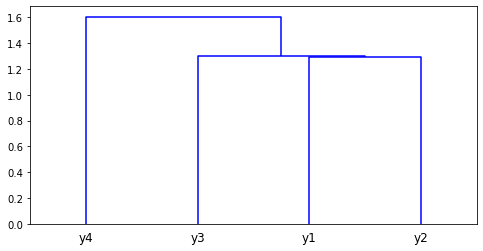

In [104]:
Z = linkage(D2, method='single')
# Z
fig = plt.figure(figsize=(8, 4))
dn = dendrogram(Z, labels=labels)

k = 2
c = fcluster(Z, k, criterion='maxclust')
c

In [88]:
D3 = pdist(items, cosine) # compute distance table
squareform(D3)

array([[0.        , 0.52338019, 0.45258404, 0.45561076],
       [0.52338019, 0.        , 0.34229263, 0.28415685],
       [0.45258404, 0.34229263, 0.        , 0.43521627],
       [0.45561076, 0.28415685, 0.43521627, 0.        ]])

array([2, 1, 1, 1], dtype=int32)

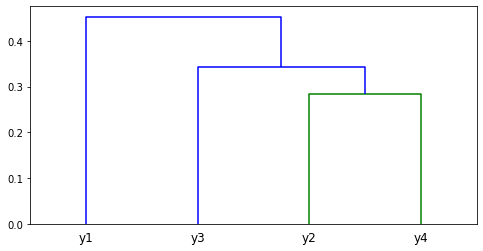

In [90]:
Z = linkage(D3, method='single')
# Z
fig = plt.figure(figsize=(8, 4))
dn = dendrogram(Z, labels=labels)

k = 2
c = fcluster(Z, k, criterion='maxclust')
c

In [105]:
items2 = [y1, y2, y3, y4]
D4 = pdist(items2, dtw_dist_ret) # compute distance table
squareform(D4)

array([[    0.        ,   185.74032196, 20990.46163469, 19990.45252856],
       [  185.74032196,     0.        , 19991.70207828, 18991.69297216],
       [20990.46163469, 19991.70207828,     0.        ,   167.71323038],
       [19990.45252856, 18991.69297216,   167.71323038,     0.        ]])

In [107]:
## Use DTW distance on the price time series

array([2, 2, 1, 1], dtype=int32)

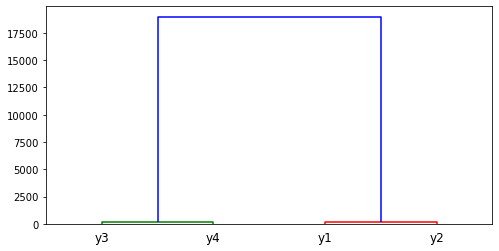

In [106]:
Z = linkage(D4, method='single')
# Z
fig = plt.figure(figsize=(8, 4))
dn = dendrogram(Z, labels=labels)

k = 2
c = fcluster(Z, k, criterion='maxclust')
c

In [ ]:
## Use Cosine distance on the price time series

In [110]:
items2 = [y1, y2, y3, y4]
D5 = pdist(items2, cosine) # compute distance table
squareform(D5)

array([[0.00000000e+00, 8.52908199e-04, 1.99980852e+00, 1.99854278e+00],
       [8.52908199e-04, 0.00000000e+00, 1.99961092e+00, 1.99977003e+00],
       [1.99980852e+00, 1.99961092e+00, 0.00000000e+00, 8.31466577e-04],
       [1.99854278e+00, 1.99977003e+00, 8.31466577e-04, 0.00000000e+00]])

array([2, 2, 1, 1], dtype=int32)

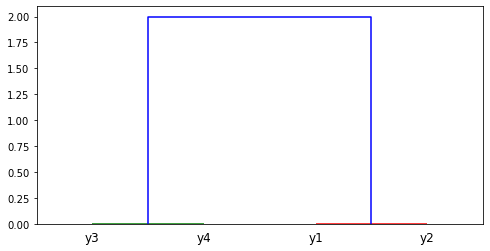

In [111]:
Z = linkage(D5, method='single')
# Z
fig = plt.figure(figsize=(8, 4))
dn = dendrogram(Z, labels=labels)

k = 2
c = fcluster(Z, k, criterion='maxclust')
c

In [ ]:
## Use Cosine distance on the price time series

In [112]:
items2 = [y1, y2, y3, y4]
D6 = pdist(items2, correlation) # compute distance table
squareform(D6)

array([[0.00000000e+00, 7.86482309e-04, 1.99933496e+00, 1.99934762e+00],
       [7.86482309e-04, 0.00000000e+00, 1.99945613e+00, 1.99923262e+00],
       [1.99933496e+00, 1.99945613e+00, 0.00000000e+00, 5.79701366e-04],
       [1.99934762e+00, 1.99923262e+00, 5.79701366e-04, 0.00000000e+00]])

array([2, 2, 1, 1], dtype=int32)

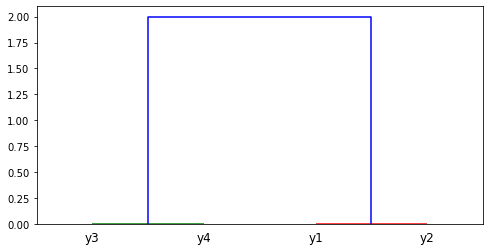

In [113]:
Z = linkage(D6, method='single')
# Z
fig = plt.figure(figsize=(8, 4))
dn = dendrogram(Z, labels=labels)

k = 2
c = fcluster(Z, k, criterion='maxclust')
c

In [ ]:
## Use Euclidean distance on the price time series should not work!

In [114]:
items2 = [y1, y2, y3, y4]
D7 = pdist(items2, correlation) # compute distance table
squareform(D7)

array([[0.00000000e+00, 7.86482309e-04, 1.99933496e+00, 1.99934762e+00],
       [7.86482309e-04, 0.00000000e+00, 1.99945613e+00, 1.99923262e+00],
       [1.99933496e+00, 1.99945613e+00, 0.00000000e+00, 5.79701366e-04],
       [1.99934762e+00, 1.99923262e+00, 5.79701366e-04, 0.00000000e+00]])

array([2, 2, 1, 1], dtype=int32)

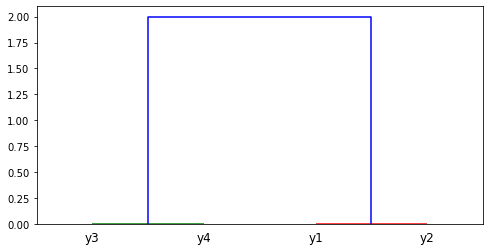

In [115]:
Z = linkage(D7, method='single')
# Z
fig = plt.figure(figsize=(8, 4))
dn = dendrogram(Z, labels=labels)

k = 2
c = fcluster(Z, k, criterion='maxclust')
c

In [116]:
### From return series, reconstruct price series then apply DTW?

In [118]:
items[0].cumsum()

array([0.06891147, 0.05758683, 0.08881546, 0.18822226, 0.19044689,
       0.24154083, 0.28972428, 0.32065139, 0.35700717, 0.35198638,
       0.37692434, 0.38952863, 0.44518338, 0.44126648, 0.51172654,
       0.53380561, 0.58056601, 0.58679975, 0.60463654, 0.60309887,
       0.6626046 , 0.69164493, 0.71558174, 0.69796431, 0.73517223,
       0.75762568, 0.80163842, 0.79734444, 0.81281709, 0.82556839,
       0.86590566, 0.88210618, 0.92790614, 0.93311514, 0.94196414,
       0.98046485, 0.96874112, 0.97383727, 0.99648072, 1.01787993,
       1.03695303, 1.07948619, 1.09343976, 1.10908086, 1.09802244,
       1.14095029, 1.14005512, 1.1620695 , 1.16295642, 1.16232272,
       1.183032  , 1.21553771, 1.23070761, 1.22381208, 1.24640699,
       1.25041806, 1.27757156, 1.29705513, 1.30463303, 1.2966905 ,
       1.30907672, 1.33377119, 1.33400573, 1.36717061, 1.36970248,
       1.38514621, 1.39902216, 1.41887643, 1.42340284, 1.42000087,
       1.44102792, 1.43621935, 1.45141086, 1.46258675, 1.48419